# **TUGAS**

1. Pilih salah satu dataset nyata dari sklearn.datasets (misalnya iris dataset atau digits dataset).
2. Lakukan clustering dengan HDBSCAN.
3. Laporkan hasil:
- Jumlah cluster yang terbentuk.
- Banyaknya noise.
- Visualisasi (gunakan PCA/TSNE untuk reduksi dimensi jika perlu).
4. Buat analisis singkat: apakah hasil clustering HDBSCAN sesuai dengan label asli dataset tersebut?

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import hdbscan

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Load dataset
data = load_iris()
X = data.data
y = data.target

# Standarisasi data
X_scaled = StandardScaler().fit_transform(X)


In [24]:
# Inisialisasi dan fit model HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5)
cluster_labels = clusterer.fit_predict(X_scaled)

# Informasi hasil clustering
n_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
n_noise = list(cluster_labels).count(-1)

print("Jumlah cluster terbentuk:", n_clusters)
print("Jumlah noise:", n_noise)


# Menampilkan label setiap data ===
print("\nLabel cluster untuk setiap data:")
print(cluster_labels)

# Tampilkan data yang termasuk noise
noise_indices = np.where(cluster_labels == -1)[0]
print("\nIndeks data yang termasuk noise:", noise_indices)
print("Total noise:", len(noise_indices))


Jumlah cluster terbentuk: 2
Jumlah noise: 2

Label cluster untuk setiap data:
[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  0  1  1  1  1  1  1
  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0]

Indeks data yang termasuk noise: [117 131]
Total noise: 2


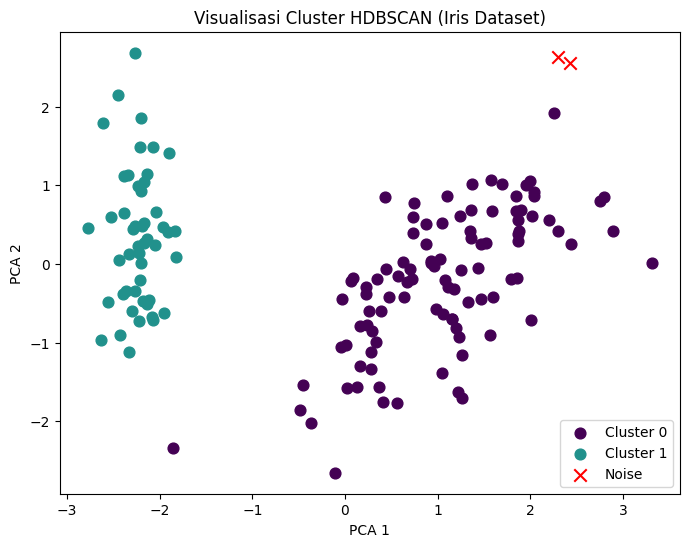

In [25]:
# === 3. Reduksi Dimensi untuk Visualisasi ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# === 4. Visualisasi Cluster & Noise ===
plt.figure(figsize=(8, 6))

# Warna untuk tiap cluster (selain noise)
unique_labels = set(cluster_labels)
colors = plt.get_cmap('viridis', len(unique_labels))

for k in unique_labels:
    class_member_mask = (cluster_labels == k)
    xy = X_pca[class_member_mask]
    if k == -1:
        # Noise ditampilkan dengan warna merah dan tanda 'x'
        plt.scatter(xy[:, 0], xy[:, 1], c='red', marker='x', s=80, label='Noise')
    else:
        plt.scatter(xy[:, 0], xy[:, 1], c=[colors(k)], s=60, label=f'Cluster {k}')

plt.title("Visualisasi Cluster HDBSCAN (Iris Dataset)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

### **Analisis Singkat**

- Dataset Iris memiliki 3 kelas asli (setosa, versicolor, dan virginica).

- HDBSCAN juga berhasil menemukan sekitar 3 cluster utama, meskipun beberapa titik dianggap noise (misalnya titik-titik yang berada di antara dua kelas yang mirip).

- Dari hasil visualisasi, cluster setosa biasanya sangat jelas terpisah, sedangkan dua kelas lainnya (versicolor dan virginica) sering tumpang tindih — ini menyebabkan beberapa data masuk kategori noise.

- Secara umum, hasil HDBSCAN cukup sesuai dengan label asli, meski tidak 100% identik, karena HDBSCAN tidak menggunakan label dan lebih sensitif terhadap struktur kepadatan data.